# Model Selection K-Nearest Neighbor

In [1]:
# import the necessary module for model selection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 , csv
from sklearn import preprocessing
%matplotlib inline

In [4]:
# load the sql magic for jupyter notebook
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [5]:
#Create a connection to database using the followint syntax below.
%sql sqlite:///project_2.db

In [6]:
#test if the loading of the data is successful
%sql SELECT * FROM data_2 LIMIT 5;

 * sqlite:///project_2.db
Done.


age,bmi,children,charges,female,male,Smoker-no,Smoker-yes
19,27.9,0,16884.924,1,0,0,1
18,33.77,1,1725.5523,0,1,1,0
28,33.0,3,4449.462,0,1,1,0
33,22.705,0,21984.47061,0,1,1,0
32,28.88,0,3866.8552,0,1,1,0


In [7]:
#Retrieve the dataset from the sqlite database
data_1 = %sql SELECT * FROM data_2;

 * sqlite:///project_2.db
Done.


In [9]:
df=data_1.DataFrame()

In [10]:
df.head()

,age,bmi,children,charges,female,male,Smoker-no,Smoker-yes
0,19,27.900,0,16884.92400,1,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0
2,28,33.000,3,4449.46200,0,1,1,0
3,33,22.705,0,21984.47061,0,1,1,0
4,32,28.880,0,3866.85520,0,1,1,0


Using the data given the following parameter above determine if the gender is either male or female


In [13]:
# Determine the value of the male counts
df['Smoker-yes'].value_counts()

0    1064
1     274
Name: Smoker-yes, dtype: int64

In [12]:
# Show the feature set 
df.columns

Index(['age', 'bmi', 'children', 'charges', 'female', 'male', 'Smoker-no',
       'Smoker-yes'],
      dtype='object')

In [14]:
#show the type of data for further check that all are suitable for analysis and there is no object type.
df.dtypes

age             int64
bmi           float64
children        int64
charges       float64
female          int64
male            int64
Smoker-no       int64
Smoker-yes      int64
dtype: object

### In order to use the scikit learn library the data needs to be converted from pandas dataframe to numpy array

#### Define the X feature of the data

In [22]:
# Convert the pandas dataframe to numpy array
x = df[['age','bmi','children','charges','female','male','Smoker-no']].values.astype(float)

In [23]:
x[0:5]

array([[1.90000000e+01, 2.79000000e+01, 0.00000000e+00, 1.68849240e+04,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.80000000e+01, 3.37700000e+01, 1.00000000e+00, 1.72555230e+03,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.80000000e+01, 3.30000000e+01, 3.00000000e+00, 4.44946200e+03,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [3.30000000e+01, 2.27050000e+01, 0.00000000e+00, 2.19844706e+04,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [3.20000000e+01, 2.88800000e+01, 0.00000000e+00, 3.86685520e+03,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

### Define the  Y feature

In [24]:
# convert the Pandas Dataframe to Numpy array
y = df['Smoker-yes'].values
y[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

### Data Normalization

 Data standardization gives the data zero mean and unit variance. it is a good 
 practice especially for KNN which is based on the distance of data points

In [25]:
X = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

In [26]:
X[0:5]

array([[-1.43876426, -0.45332   , -0.90861367,  0.2985838 ,  1.0105187 ,
        -1.0105187 , -1.97058663],
       [-1.50996545,  0.5096211 , -0.07876719, -0.95368917, -0.98959079,
         0.98959079,  0.5074631 ],
       [-0.79795355,  0.38330685,  1.58092576, -0.72867467, -0.98959079,
         0.98959079,  0.5074631 ],
       [-0.4419476 , -1.30553108, -0.90861367,  0.71984298, -0.98959079,
         0.98959079,  0.5074631 ],
       [-0.51314879, -0.29255641, -0.90861367, -0.77680218, -0.98959079,
         0.98959079,  0.5074631 ]])

### Train Test Split

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .2, random_state = 4)

print("Train set:",x_train.shape,y_train.shape)
print("Test set:", x_test.shape, y_test.shape)

Train set: (1070, 7) (1070,)
Test set: (268, 7) (268,)


## Classification Algorithm K - Nearest Neighbor

In [30]:
#import the K nearest neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier

In [32]:
k = 3

# Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=3)

In [34]:
# Predict
yhat = neigh.predict(x_test)
yhat[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

##### Accuracy Evaluation

In [35]:
from sklearn import metrics

print("Train set accuracy: ", metrics.accuracy_score(y_train,neigh.predict(x_train)))
print("Test set accuracy: ", metrics.accuracy_score(y_test,yhat))

Train set accuracy:  0.9542056074766355
Test set accuracy:  0.8955223880597015


From the result above it shows that KNN nearest neighbor have a fair high accuracy in train and test set. to further maximize the accuracy and determine the optimize value of K lets try to run some of the functions to find the efficient k value.


In [37]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.88059701, 0.85820896, 0.89552239, 0.89179104, 0.92910448,
       0.90671642, 0.92537313, 0.92537313, 0.93656716])

##### Plot the model accuracy for a different number of neighbors.

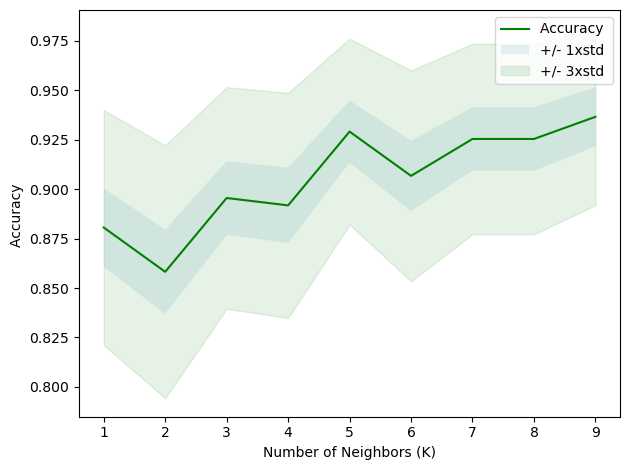

In [38]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

##### Therefore the K = 5 produce the highest accuracy with a value of 92.5 % than the rest of the k = value